**Load the Alzheimer's Dataset**

In [ ]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix


In [ ]:
alzheimers_data_path = '/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv'
alzheimers_df = pd.read_csv(alzheimers_data_path)
print("First few rows of the Alzheimer's dataset:")
alzheimers_df.head()


First few rows of the Alzheimer's dataset:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


**Load the IEMOCAP Dataset**

In [ ]:
iemocap_data_path = '/kaggle/input/iemocap/IEMOCAP_features.pkl'
with open(iemocap_data_path, 'rb') as file:
    iemocap_data = pickle.load(file)

print("Type of IEMOCAP data:", type(iemocap_data))
print("IEMOCAP data keys:", iemocap_data.keys() if isinstance(iemocap_data, dict) else "Not a dictionary")


Type of IEMOCAP data: <class 'list'>
IEMOCAP data keys: Not a dictionary


**Explore the IEMOCAP Dataset**

In [ ]:
# Extract the first dictionary
first_dict = iemocap_data[0]

# Display the keys in this dictionary
print("Keys in the first dictionary:")
print(first_dict.keys())

# Display the first few elements of the first key's list
first_key = list(first_dict.keys())[0]
print(f"\nFirst few elements of '{first_key}':")
print(first_dict[first_key][:5])


Keys in the first dictionary:
dict_keys(['Ses02F_script01_3', 'Ses03F_script03_1', 'Ses01F_script02_2', 'Ses02F_impro05', 'Ses05M_impro02', 'Ses04M_impro04', 'Ses02F_script01_1', 'Ses03M_impro08b', 'Ses05F_script01_2', 'Ses01F_impro03', 'Ses02M_script02_2', 'Ses03M_impro05b', 'Ses04F_impro07', 'Ses05M_script01_2', 'Ses01M_impro05', 'Ses03F_impro08', 'Ses02M_impro01', 'Ses05F_script03_2', 'Ses02M_impro05', 'Ses05M_script03_2', 'Ses05M_impro05', 'Ses04M_impro06', 'Ses04M_script03_2', 'Ses01F_impro04', 'Ses01F_script03_1', 'Ses01M_impro01', 'Ses03M_impro07', 'Ses05M_script01_3', 'Ses04F_script01_1', 'Ses03F_script02_1', 'Ses01M_impro03', 'Ses03M_script02_1', 'Ses01M_script01_3', 'Ses05F_impro03', 'Ses01M_impro02', 'Ses03M_script02_2', 'Ses05F_script03_1', 'Ses01M_script01_1', 'Ses03F_script03_2', 'Ses05F_script01_3', 'Ses03F_impro02', 'Ses03M_impro04', 'Ses03M_impro03', 'Ses05M_script02_1', 'Ses01M_script03_1', 'Ses04M_script03_1', 'Ses03M_script01_2', 'Ses01M_impro07', 'Ses03F_impro01', 

In [ ]:
data_path = '/kaggle/input/iemocap/IEMOCAP_features.pkl'
videoIDs, videoSpeakers, videoLabels, videoText, videoAudio, videoVisual, videoSentence, trainVid, testVid = pickle.load(open(data_path, 'rb'), encoding='latin1')

# Select a specific dialogue ID to explore
dialogue_id = 'Ses03M_impro08b'

# Explore speakers, labels, and features associated with this dialogue
print("Speakers in the dialogue:", videoSpeakers[dialogue_id], '\n')
print("Emotion labels for each utterance:", videoLabels[dialogue_id], '\n')
print("Number of text features:", len(videoText[dialogue_id]), "Shape of first text feature:", videoText[dialogue_id][0].shape, '\n')
print("Number of audio features:", len(videoAudio[dialogue_id]), "Shape of first audio feature:", videoAudio[dialogue_id][0].shape, '\n')
print("Number of visual features:", len(videoVisual[dialogue_id]), "Shape of first visual feature:", videoVisual[dialogue_id][0].shape, '\n')
print("Raw sentences in the dialogue:", videoSentence[dialogue_id], '\n')


Speakers in the dialogue: ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'F'] 

Emotion labels for each utterance: [2, 5, 2, 5, 2, 5, 2, 5, 2, 3, 3, 5, 2, 5, 2, 5, 2, 5, 2, 2, 5, 2, 5, 2, 5, 2, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

Number of text features: 42 Shape of first text feature: (100,) 

Number of audio features: 42 Shape of first audio feature: (100,) 

Number of visual features: 42 Shape of first visual feature: (512,) 

Raw sentences in the dialogue: ['Hello?', "Oh God I finally got...you know how long I've been waiting on line?  You put on hold for like five hours.  Geez.", "I'm sorry ma'am.  What's the nature of your problem?  But first can I get you to tell me your first and last name?", "I've already been through this five times with these people.  I've been calling every single day.", "I know I just n

**Summarize Emotional Features**

In [ ]:
# Get the emotion labels for the dialogue
emotion_labels = videoLabels[dialogue_id]

# Calculate the distribution of emotions in the dialogue
unique, counts = np.unique(emotion_labels, return_counts=True)
emotion_distribution = dict(zip(unique, counts))

print("Emotion Distribution in the Dialogue:")
print(emotion_distribution)

# calculate the dominant emotion
dominant_emotion = unique[np.argmax(counts)]
print(f"Dominant Emotion in the Dialogue: {dominant_emotion}")


Emotion Distribution in the Dialogue:
{2: 26, 3: 2, 5: 14}
Dominant Emotion in the Dialogue: 2


**Integrate Emotional Features with Alzheimer's Dataset**

In [ ]:
# create a new DataFrame with emotional features
alzheimers_emotion_df = alzheimers_df.copy()

# Add columns for emotion distribution and dominant emotion
alzheimers_emotion_df['Emotion_Distribution'] = np.nan
alzheimers_emotion_df['Dominant_Emotion'] = np.nan

patient_id = 4751
emotion_dist_str = str(emotion_distribution)
alzheimers_emotion_df.loc[alzheimers_emotion_df['PatientID'] == patient_id, 'Emotion_Distribution'] = emotion_dist_str
alzheimers_emotion_df.loc[alzheimers_emotion_df['PatientID'] == patient_id, 'Dominant_Emotion'] = dominant_emotion

print(alzheimers_emotion_df[alzheimers_emotion_df['PatientID'] == patient_id])


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...       ADL  \
0           13.297218          6.327112     1.347214  ...  1.725883   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   

   Forgetfulness  Diagnosis  DoctorInCharge  Emotion_Distribution  \
0              0          0       XXXConfid  {2: 26, 3: 2, 5: 14}   

   Dominant_Emotion  
0               2.0  

[1 rows x 37 columns]


/tmp/ipykernel_36/2119156764.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{2: 26, 3: 2, 5: 14}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  alzheimers_emotion_df.loc[alzheimers_emotion_df['PatientID'] == patient_id, 'Emotion_Distribution'] = emotion_dist_str


**Process and Save Emotional Features for Multiple Dialogues**

In [ ]:
# Initialize a new DataFrame to store the results
alzheimers_emotion_df = alzheimers_df.copy()
alzheimers_emotion_df['Emotion_Distribution'] = np.nan
alzheimers_emotion_df['Dominant_Emotion'] = np.nan

dialogue_ids = list(videoLabels.keys())[:50]

# Process each dialogue
for i, dialogue_id in enumerate(dialogue_ids):
    # Get the emotion labels for the dialogue
    emotion_labels = videoLabels[dialogue_id]

    # Calculate the distribution of emotions in the dialogue
    unique, counts = np.unique(emotion_labels, return_counts=True)
    emotion_distribution = dict(zip(unique, counts))

    # Calculate the dominant emotion
    dominant_emotion = unique[np.argmax(counts)]

    patient_id = 4751 + i
    emotion_dist_str = str(emotion_distribution)

    # Update the DataFrame
    alzheimers_emotion_df.loc[alzheimers_emotion_df['PatientID'] == patient_id, 'Emotion_Distribution'] = emotion_dist_str
    alzheimers_emotion_df.loc[alzheimers_emotion_df['PatientID'] == patient_id, 'Dominant_Emotion'] = dominant_emotion

print(alzheimers_emotion_df.head(5))

alzheimers_emotion_df.to_csv('alzheimers_emotion_data.csv', index=False)


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...       ADL  \
0           13.297218          6.327112     1.347214  ...  1.725883   
1            4.542524          7.619885     0.518767  ...  2.592424   
2           19.555085          7.844988     1.826335  ...  7.119548   
3           12.209266          8.428001     7.435604  ...  6.481226   
4           18.454356          6.310461     0.795498  ...  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0         

/tmp/ipykernel_36/3421498768.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{0: 5, 1: 23, 2: 1, 4: 1}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  alzheimers_emotion_df.loc[alzheimers_emotion_df['PatientID'] == patient_id, 'Emotion_Distribution'] = emotion_dist_str


**Exploratory Data Analysis (EDA)**

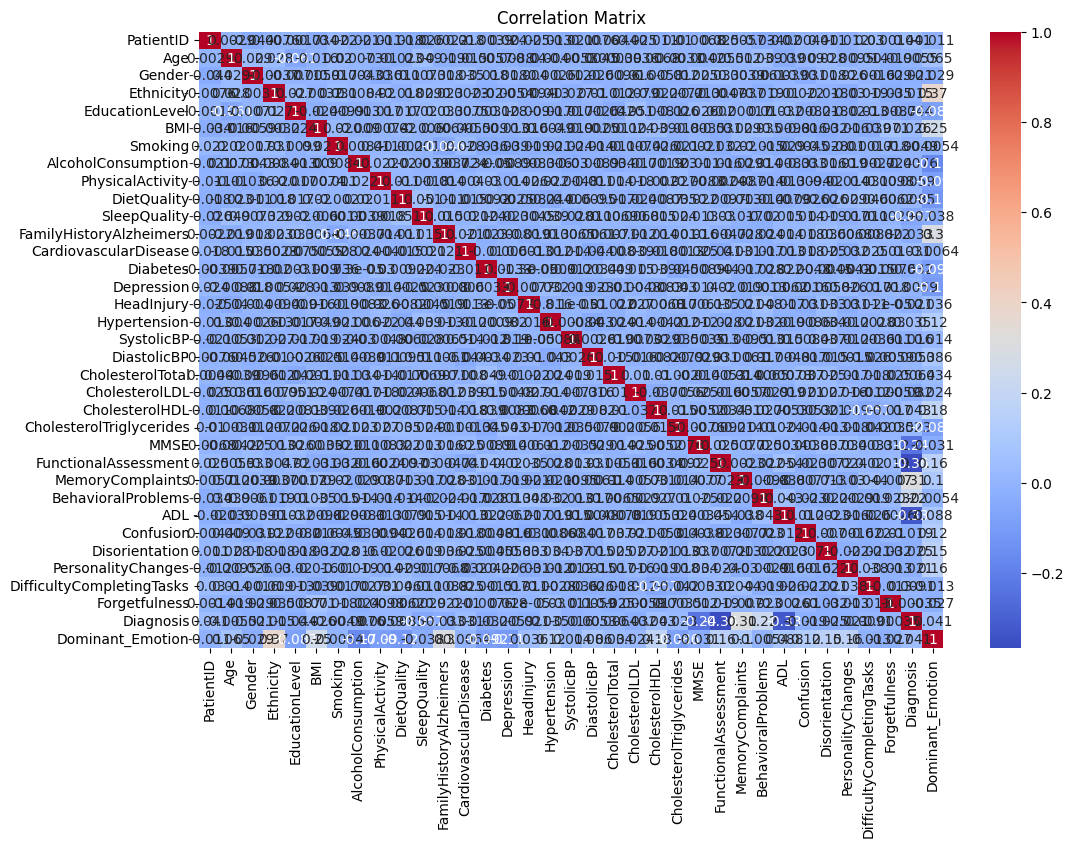

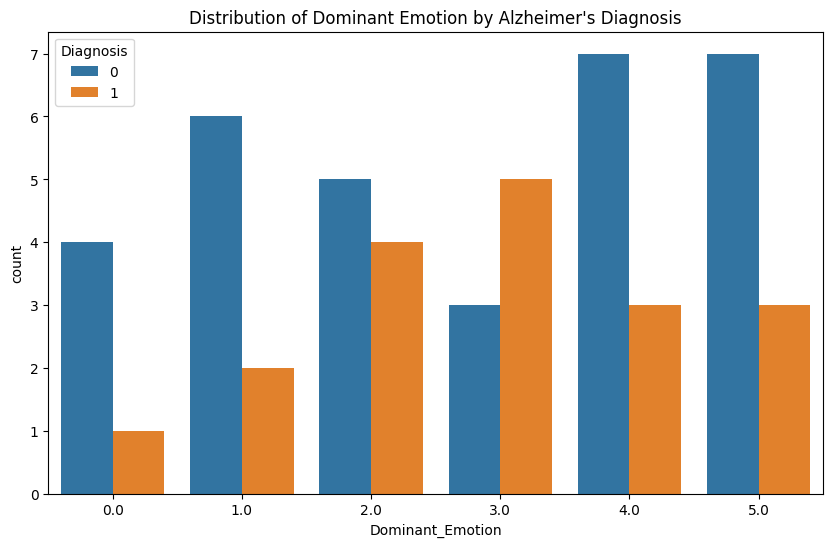

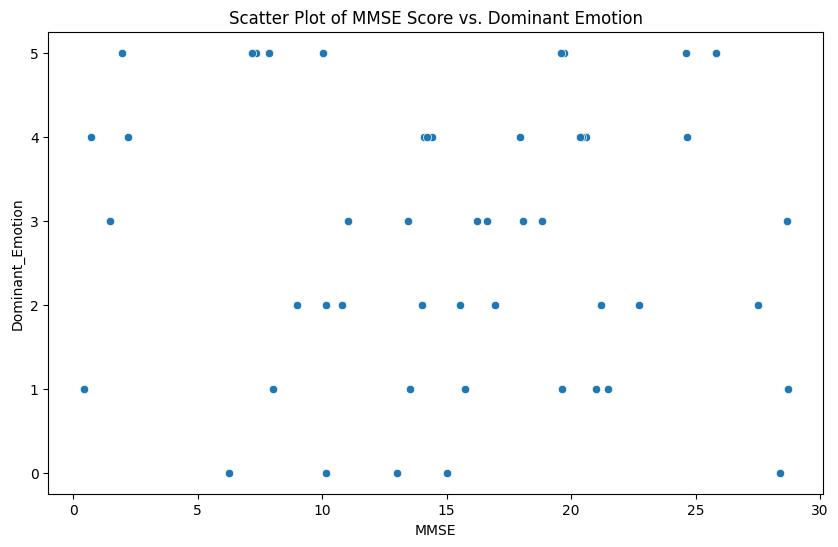

In [ ]:
# Select numeric columns for correlation
numeric_df = alzheimers_emotion_df.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Dominant Emotion by Diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', hue='Diagnosis', data=alzheimers_emotion_df)
plt.title('Distribution of Dominant Emotion by Alzheimer\'s Diagnosis')
plt.show()

# Scatter plot of Dominant Emotion vs. MMSE score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MMSE', y='Dominant_Emotion', data=alzheimers_emotion_df)
plt.title('Scatter Plot of MMSE Score vs. Dominant Emotion')
plt.show()


**Model Building**

In [ ]:
# Select features and target variable
features = ['Age', 'Gender', 'BMI', 'PhysicalActivity', 'DietQuality', 'MMSE', 'ADL', 'Dominant_Emotion']
X = alzheimers_emotion_df[features]
y = alzheimers_emotion_df['Diagnosis']

# Handle missing values (if any)
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

# Detailed classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.7605

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       277
           1       0.68      0.62      0.65       153

    accuracy                           0.76       430
   macro avg       0.74      0.73      0.73       430
weighted avg       0.76      0.76      0.76       430


Random Forest Confusion Matrix:
[[232  45]
 [ 58  95]]


**Fine-Tune the Random Forest Model with GridSearchCV**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the fine-tuned model
fine_tuned_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Fine-Tuned Random Forest Model Accuracy: {fine_tuned_accuracy:.4f}")

# Detailed classification report
print("\nFine-Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Confusion matrix
print("\nFine-Tuned Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; to

**Analyze Feature Importance**

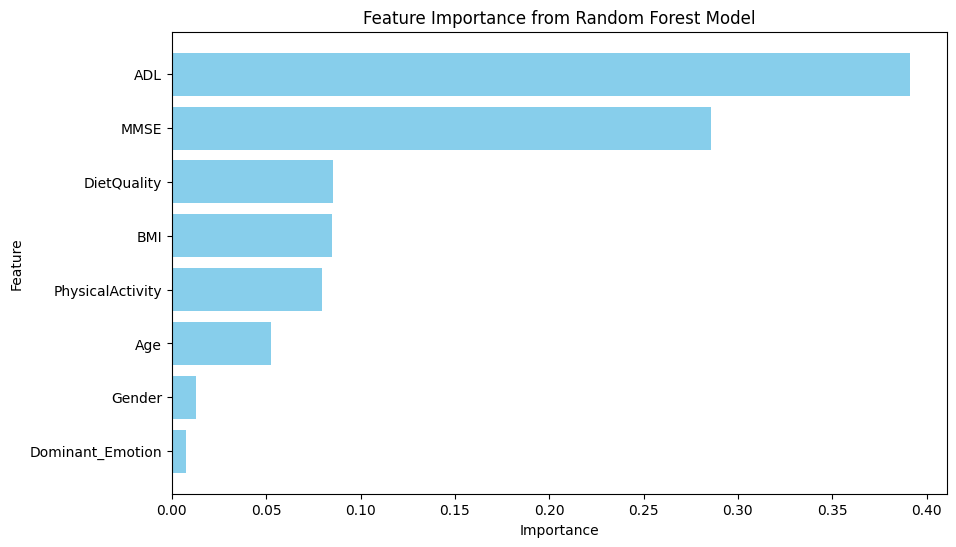

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, min_samples_lea

In [ ]:
# Extract feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


**Adjusting Class Weights in Random Forest**

In [ ]:
# Initialize the Random Forest model with class weights
rf_weighted = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5,
                                     min_samples_leaf=1, bootstrap=False, class_weight='balanced')

# Train the model
rf_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = rf_weighted.predict(X_test)

# Evaluate the model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Random Forest Model Accuracy: {accuracy_weighted:.4f}")

# Detailed classification report
print("\nWeighted Random Forest Classification Report:")
print(classification_report(y_test, y_pred_weighted))

# Confusion matrix
print("\nWeighted Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_weighted))


Weighted Random Forest Model Accuracy: 0.7442

Weighted Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       277
           1       0.63      0.67      0.65       153

    accuracy                           0.74       430
   macro avg       0.72      0.73      0.72       430
weighted avg       0.75      0.74      0.75       430


Weighted Random Forest Confusion Matrix:
[[218  59]
 [ 51 102]]


**Applying SMOTE for Oversampling the Minority Class**

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest model on the SMOTE data
rf_smote = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=1, bootstrap=False)
rf_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = rf_smote.predict(X_test)

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"SMOTE Random Forest Model Accuracy: {accuracy_smote:.4f}")

# Detailed classification report
print("\nSMOTE Random Forest Classification Report:")
print(classification_report(y_test, y_pred_smote))

# Confusion matrix
print("\nSMOTE Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))


SMOTE Random Forest Model Accuracy: 0.7512

SMOTE Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       277
           1       0.64      0.69      0.66       153

    accuracy                           0.75       430
   macro avg       0.73      0.74      0.73       430
weighted avg       0.76      0.75      0.75       430


SMOTE Random Forest Confusion Matrix:
[[218  59]
 [ 48 105]]


**Voting Classifier**

In [ ]:
# Combine Random Forest, XGBoost, and Gradient Boosting
voting_model = VotingClassifier(
    estimators=[('rf', rf_smote), ('xgb', best_xgb), ('gb', gb_model)],
    voting='soft'  # 'soft' uses predicted probabilities, 'hard' uses predicted classes
)

# Train
voting_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_voting = voting_model.predict(X_test)

# Evaluate
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Model Accuracy: {voting_accuracy:.4f}")
print("\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))
print("\nVoting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))


Voting Classifier Model Accuracy: 0.7465

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       277
           1       0.64      0.65      0.64       153

    accuracy                           0.75       430
   macro avg       0.72      0.72      0.72       430
weighted avg       0.75      0.75      0.75       430


Voting Classifier Confusion Matrix:
[[222  55]
 [ 54  99]]


In [ ]:
voting_model_refined = VotingClassifier(
    estimators=[('rf', rf_smote), ('xgb', best_xgb), ('gb', gb_model)],
    voting='soft',  # Using 'soft' voting to consider the predicted probabilities
    weights=[2, 1, 1],
    n_jobs=-1
)

# Train the refined voting model
voting_model_refined.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_voting_refined = voting_model_refined.predict(X_test)

# Evaluate the refined voting model
voting_refined_accuracy = accuracy_score(y_test, y_pred_voting_refined)
print(f"Refined Voting Classifier Model Accuracy: {voting_refined_accuracy:.4f}")

# Detailed classification report
print("\nRefined Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting_refined))

# Confusion matrix
print("\nRefined Voting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting_refined))


Refined Voting Classifier Model Accuracy: 0.7488

Refined Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       277
           1       0.64      0.66      0.65       153

    accuracy                           0.75       430
   macro avg       0.73      0.73      0.73       430
weighted avg       0.75      0.75      0.75       430


Refined Voting Classifier Confusion Matrix:
[[221  56]
 [ 52 101]]


**Implementation of Stacking with a Meta-Learner**

In [ ]:
# Initialize the base models
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=1, bootstrap=False)
xgb_model = XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)

# Initialize the meta-learner
meta_learner = LogisticRegression()

# Initialize the stacking model
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('gb', gb_model)],
    final_estimator=meta_learner,
    cv=5,  # Cross-validation to better estimate the model's performance
    n_jobs=-1
)

# Train the stacking model
stacking_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the stacking model
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Model Accuracy: {stacking_accuracy:.4f}")

# Detailed classification report
print("\nStacking Model Classification Report:")
print(classification_report(y_test, y_pred_stacking))

# Confusion matrix
print("\nStacking Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacking))


Stacking Model Accuracy: 0.7512

Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       277
           1       0.64      0.69      0.66       153

    accuracy                           0.75       430
   macro avg       0.73      0.74      0.73       430
weighted avg       0.76      0.75      0.75       430


Stacking Model Confusion Matrix:
[[218  59]
 [ 48 105]]


**Threshold Tuning**

In [ ]:
# Predict probabilities instead of classes
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Initialize variables to track the best threshold
best_threshold = 0.5
best_f1 = 0

# Check thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 0.9, 0.01)
for threshold in thresholds:
    # Apply the threshold to predictions
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)

    # Evaluate the model
    f1 = f1_score(y_test, y_pred_threshold)

    # Update the best threshold if the current one is better
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Apply the best threshold
y_pred_best_threshold = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the final model with the best threshold
final_accuracy = accuracy_score(y_test, y_pred_best_threshold)
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Final Model Accuracy with Best Threshold: {final_accuracy:.4f}")
print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_best_threshold))
print("\nFinal Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_threshold))


Best Threshold: 0.36
Final Model Accuracy with Best Threshold: 0.7581

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       277
           1       0.64      0.73      0.68       153

    accuracy                           0.76       430
   macro avg       0.74      0.75      0.74       430
weighted avg       0.77      0.76      0.76       430


Final Model Confusion Matrix:
[[214  63]
 [ 41 112]]


**Feature Engineering**

In [ ]:
# Check the shape of the DataFrame
print("DataFrame shape:", alzheimers_emotion_df.shape)


DataFrame shape: (2149, 45)


In [ ]:
# Check for duplicate columns
print("Duplicate columns:", alzheimers_emotion_df.columns.duplicated().sum())


Duplicate columns: 3


In [ ]:
# Check the lengths of the columns involved
print("Length of Age column:", len(alzheimers_emotion_df['Age']))
print("Length of BMI column:", len(alzheimers_emotion_df['BMI']))
print("Length of PhysicalActivity column:", len(alzheimers_emotion_df['PhysicalActivity']))
print("Length of DietQuality column:", len(alzheimers_emotion_df['DietQuality']))


Length of Age column: 2149
Length of BMI column: 2149
Length of PhysicalActivity column: 2149
Length of DietQuality column: 2149


In [ ]:
# Identify duplicate columns
duplicate_columns = alzheimers_emotion_df.columns[alzheimers_emotion_df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

# Remove duplicate columns
alzheimers_emotion_df = alzheimers_emotion_df.loc[:, ~alzheimers_emotion_df.columns.duplicated()]
print("DataFrame shape after removing duplicates:", alzheimers_emotion_df.shape)


Duplicate columns: Index(['Age', 'BMI', 'MMSE'], dtype='object')
DataFrame shape after removing duplicates: (2149, 42)


In [ ]:
# Check the shape and the first few rows of the DataFrame to ensure it's clean
print("DataFrame shape:", alzheimers_emotion_df.shape)
alzheimers_emotion_df.head()


DataFrame shape: (2149, 42)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Forgetfulness,Diagnosis,DoctorInCharge,Emotion_Distribution,Dominant_Emotion,Age_BMI,Physical_Diet,Age BMI,Age MMSE,BMI MMSE
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,XXXConfid,"{0: 5, 1: 23, 2: 1, 4: 1}",1.0,1673.725694,8.523976,1673.725694,1566.837863,492.110488
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,1,0,XXXConfid,"{0: 3, 1: 2, 2: 4, 4: 9}",4.0,2387.663626,3.952946,2387.663626,1834.580790,553.006164
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,XXXConfid,"{0: 10, 1: 9, 2: 21, 3: 5, 4: 2, 5: 25}",5.0,1299.099418,14.327573,1299.099418,537.006150,130.910936
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,0,XXXConfid,"{2: 25, 3: 3, 5: 10}",2.0,2501.260461,62.667282,2501.260461,1035.343416,472.911532
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,XXXConfid,"{1: 22, 2: 1, 4: 1, 5: 5}",1.0,1843.810671,5.019956,1843.810671,1203.067192,280.043950


**Polynomial Features**

In [ ]:
# Get original feature names before transformation
original_feature_names = ['Age', 'BMI', 'MMSE']

# Apply polynomial features
poly_features = poly.fit_transform(alzheimers_emotion_df[original_feature_names])

# Create DataFrame with new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(original_feature_names))

# Concatenate these features with the original dataset
alzheimers_emotion_df = pd.concat([alzheimers_emotion_df.reset_index(drop=True), poly_features_df.reset_index(drop=True)], axis=1)


In [ ]:
# Check the structure of the 'Age' and 'MMSE' columns
print("Age column type:", type(alzheimers_emotion_df['Age']))
print("MMSE column type:", type(alzheimers_emotion_df['MMSE']))

# Check for any issues in these columns
print(alzheimers_emotion_df['Age'].head())
print(alzheimers_emotion_df['MMSE'].head())


Age column type: <class 'pandas.core.frame.DataFrame'>
MMSE column type: <class 'pandas.core.frame.DataFrame'>
   Age   Age
0   73  73.0
1   89  89.0
2   73  73.0
3   74  74.0
4   89  89.0
        MMSE       MMSE
0  21.463532  21.463532
1  20.613267  20.613267
2   7.356249   7.356249
3  13.991127  13.991127
4  13.517609  13.517609


In [ ]:
# If there are any issues with the column types or structures, convert them back to a one-dimensional Series
alzheimers_emotion_df['Age'] = alzheimers_emotion_df['Age'].astype(float)
alzheimers_emotion_df['MMSE'] = alzheimers_emotion_df['MMSE'].astype(float)


In [ ]:
# Select one of the 'Age' and 'MMSE' columns
alzheimers_emotion_df['Age'] = alzheimers_emotion_df['Age'].iloc[:, 0]
alzheimers_emotion_df['MMSE'] = alzheimers_emotion_df['MMSE'].iloc[:, 0]

# Verify that they are now one-dimensional Series
print("Age column type after fix:", type(alzheimers_emotion_df['Age']))
print("MMSE column type after fix:", type(alzheimers_emotion_df['MMSE']))


Age column type after fix: <class 'pandas.core.frame.DataFrame'>
MMSE column type after fix: <class 'pandas.core.frame.DataFrame'>


In [ ]:
alzheimers_emotion_df['Age'] = alzheimers_emotion_df['Age'].iloc[:, 0]
alzheimers_emotion_df['MMSE'] = alzheimers_emotion_df['MMSE'].iloc[:, 0]

print(type(alzheimers_emotion_df['Age']))  # Should output <class 'pandas.core.series.Series'>
print(type(alzheimers_emotion_df['MMSE']))  # Should output <class 'pandas.core.series.Series'>


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Drop any remaining duplicate columns t
alzheimers_emotion_df = alzheimers_emotion_df.loc[:, ~alzheimers_emotion_df.columns.duplicated()]


In [ ]:
# Print out the first few rows to confirm the structure
print(alzheimers_emotion_df[['Age', 'MMSE']].head())


    Age       MMSE
0  73.0  21.463532
1  89.0  20.613267
2  73.0   7.356249
3  74.0  13.991127
4  89.0  13.517609


In [ ]:
# Binning Age into categories
alzheimers_emotion_df['Age_bin'] = pd.cut(alzheimers_emotion_df['Age'], bins=[60, 70, 80, 90], labels=['60-70', '70-80', '80-90'])

# Binning MMSE scores
alzheimers_emotion_df['MMSE_bin'] = pd.cut(alzheimers_emotion_df['MMSE'], bins=[0, 10, 20, 30], labels=['0-10', '10-20', '20-30'])


In [ ]:
# Log transform skewed features
alzheimers_emotion_df['Log_BMI'] = np.log1p(alzheimers_emotion_df['BMI'])
alzheimers_emotion_df['Log_AlcoholConsumption'] = np.log1p(alzheimers_emotion_df['AlcoholConsumption'])


In [ ]:
# Drop the 'DoctorInCharge' column
alzheimers_emotion_df = alzheimers_emotion_df.drop(['DoctorInCharge'], axis=1)


In [ ]:
# Drop the 'Emotion_Distribution' column
alzheimers_emotion_df = alzheimers_emotion_df.drop(['Emotion_Distribution'], axis=1)


In [ ]:
# Splitting the updated dataset
X = alzheimers_emotion_df.drop(['Diagnosis'], axis=1)
y = alzheimers_emotion_df['Diagnosis']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Retrain the model (e.g., XGBoost or Random Forest)
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Evaluate the model
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy after Feature Engineering: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Final Model Accuracy after Feature Engineering: 0.9442

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       277
           1       0.93      0.91      0.92       153

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.94      0.94      0.94       430


Confusion Matrix:
[[267  10]
 [ 14 139]]


In [ ]:
import joblib


In [ ]:
# Save the trained model
model_filename = 'emotion_recognition_with_alzheimers.pkl'
joblib.dump(final_model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as emotion_recognition_with_alzheimers.pkl


In [ ]:
# Load the model back to verify
loaded_model = joblib.load(model_filename)

# Check if the loaded model works by making predictions
y_pred_loaded = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded Model Accuracy: {loaded_accuracy:.4f}")


Loaded Model Accuracy: 0.9442
